In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [417]:
df = pd.read_csv('kmean.csv')
df 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,18.75,39
1,2,21,18.75,81
2,3,20,20.00,6
3,4,23,20.00,77
4,5,31,21.25,40
...,...,...,...,...
112,113,38,80.00,42
113,114,19,80.00,46
114,115,18,81.25,48
115,116,19,81.25,50


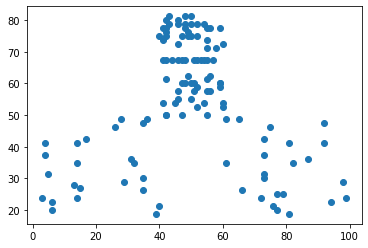

In [418]:
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.show()

In [419]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [420]:
y_predicted=km.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])
y_predicted

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [421]:
df['cluster']=y_predicted
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,18.75,39,1
1,2,21,18.75,81,2
2,3,20,20.00,6,1
3,4,23,20.00,77,2
4,5,31,21.25,40,1
...,...,...,...,...,...
112,113,38,80.00,42,0
113,114,19,80.00,46,0
114,115,18,81.25,48,0
115,116,19,81.25,50,0


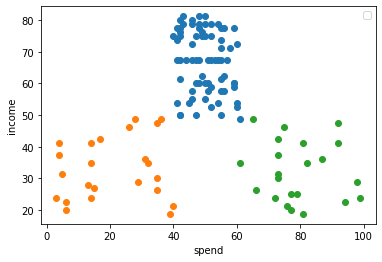

In [422]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
 
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'] )
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'] )
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'] )
 
plt.xlabel('spend')
plt.ylabel('income')
plt.legend()

In [423]:
km.cluster_centers_


array([[49.84722222, 66.97916667],
       [20.91304348, 33.09782609],
       [79.36363636, 32.15909091]])

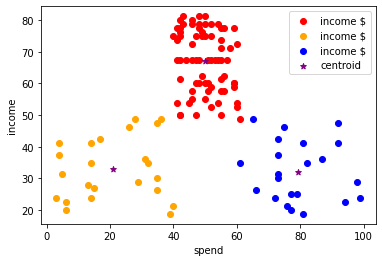

In [425]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
 

plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],color='red', label='income $' )
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],color='orange' ,label='income $' )
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],color='blue' ,label='income $')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('spend')
plt.ylabel('income')
plt.legend()

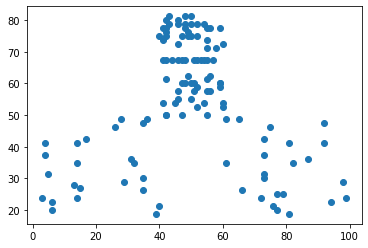

In [426]:
#dbscan
df = pd.read_csv('kmean.csv')
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.show()

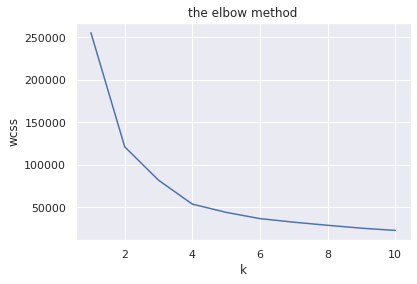

In [515]:
wcss=[]
for i in range(1,11):
     kmeans = KMeans(n_clusters=i,
                     init='k-means++',max_iter=117,n_init=10)
     kmeans.fit(df)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("k")
plt.ylabel("wcss")
plt.show()     

In [543]:
dbscan=DBSCAN(eps=4,min_samples=3)
labels=dbscan.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

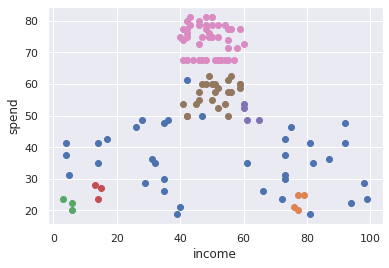

In [544]:
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==-1,0],df[['Annual Income (k$)']].iloc[labels==-1,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==0,0],df[['Annual Income (k$)']].iloc[labels==0,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==1,0],df[['Annual Income (k$)']].iloc[labels==1,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==2,0],df[['Annual Income (k$)']].iloc[labels==2,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==3,0],df[['Annual Income (k$)']].iloc[labels==3,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==4,0],df[['Annual Income (k$)']].iloc[labels==4,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==5,0],df[['Annual Income (k$)']].iloc[labels==5,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==6,0],df[['Annual Income (k$)']].iloc[labels==6,0])
plt.scatter(df[['Spending Score (1-100)']].iloc[labels==7,0],df[['Annual Income (k$)']].iloc[labels==7,0])
plt.xlabel("income")
plt.ylabel("spend")
plt.show()
